In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
df_works = pd.read_csv('../data/processed/neuroai-works.csv')
df_works.head()

,id,ssid,title,publication_year,journal,link,author_list,author_list_unabridged,cited_by_count,openai_category,...,ss_cited_by_count,oa_cited_journals,ss_cited_journals,reason,tsne_x,tsne_y,mds_x,mds_y,umap_x,umap_y
0,https://openalex.org/W2949878741,f018a49848ebd7a87c054634cdf9c4b67c89cbbf,Sharpening of Hierarchical Visual Feature Repr...,2018,ENeuro,https://doi.org/10.1523/eneuro.0443-17.2018,"Mohamed Abdelhack, Yukiyasu Kamitani","Mohamed Abdelhack, Yukiyasu Kamitani",12,A,...,10.0,"Nature Neuroscience, Behavioral and Brain Scie...","NeuroImage, PLoS Comput. Biol., Nature Reviews...",Manually added,-41.522710,-4.666548,-0.357582,0.064470,5.820169,6.134290
1,https://openalex.org/W2909256551,0bf4a54c420c88e2a11dce33b953d555927a1114,Conflicting Bottom-up and Top-down Signals dur...,2019,NaN,https://doi.org/10.1101/521252,"Mohamed Abdelhack, Yukiyasu Kamitani","Mohamed Abdelhack, Yukiyasu Kamitani",0,C,...,0.0,"The Journal of Neuroscience, Nature Reviews Ne...","NeuroImage, NeuroImage, Neuron, Current Opinio...",Manually added,-15.414878,1.188529,0.426894,-0.416218,6.464649,5.865835
2,https://openalex.org/W2471892705,5f6f4deeb5f3e21b1667652f3aa6c0a8ff0cb3ea,Model Constrained by Visual Hierarchy Improves...,2016,PLOS Computational Biology,https://doi.org/10.1371/journal.pcbi.1004927,"Jan Antolik, Sonja B. Hofer, James A. Bednar, ...","Jan Antolik, Sonja B. Hofer, James A. Bednar, ...",40,B,...,45.0,"The Journal of Physiology, Nature Neuroscience...","Nature Neuroscience, PLOS Computational Biolog...",Manually added,1.177273,-29.615396,-0.274073,-0.200388,7.521558,6.663988
3,https://openalex.org/W2794544100,3b6c27bf05d052ddbe48dc5ee05288ec0d69d34b,What deep learning can tell us about higher co...,2018,NaN,https://doi.org/10.31234/osf.io/9skeq,"Jaan Aru, Raul Vicente","Jaan Aru, Raul Vicente",2,A,...,2.0,"Neuron, Trends in Cognitive Sciences, Current ...","Current Biology, NeuroImage, Trends in Cogniti...",Manually added,27.428068,16.112732,0.166184,0.075113,6.118762,8.277772
4,https://openalex.org/W3201591402,5e3360e04c9b4dd6a88f425c8c14a69a920b2824,Training for object recognition with increasin...,2021,Journal of Vision,https://doi.org/10.1167/jov.21.10.14,"Lev Kiar Avberšek, Astrid Zeman, Hans Op de Beeck","Lev Kiar Avberšek, Astrid Zeman, Hans Op de Beeck",4,A,...,6.0,"Psychological Science, Vision Research, PLOS C...","Journal of Vision, NeuroImage, PLoS Comput. Bi...",Manually added,-41.195340,-8.435729,-0.248571,0.256874,5.735037,5.905896


In [3]:
df_works.columns

Index(['id', 'ssid', 'title', 'publication_year', 'journal', 'link',
       'author_list', 'author_list_unabridged', 'cited_by_count',
       'openai_category', 'abstract', 'abstract_highlighted',
       'ss_cited_by_count', 'oa_cited_journals', 'ss_cited_journals', 'reason',
       'tsne_x', 'tsne_y', 'mds_x', 'mds_y', 'umap_x', 'umap_y'],
      dtype='object')

# Compute cumulative citations for NeuroAI papers

In [4]:
with open('../data/processed/citation-graph.pkl', 'rb') as f:
    data = pickle.load(f)

children = data['children']

In [5]:
cumulative_citations = set()
for _, row in df_works.iterrows():
    if row.openai_category in ['A', 'C']:
        cumulative_citations |= children[row['ssid']]

len(cumulative_citations)

49317

# Look at trends of NeuroAI vs. baseline works over time.

In [6]:
df_all = pd.read_csv('../data/processed/all-works.csv')
df_all.head()

,id,ssid,title,publication_year,journal,link,author_list,cited_by_count,openai_category,ss_cited_by_count,oa_cited_journals,ss_cited_journals,reason
0,https://openalex.org/W2949878741,f018a49848ebd7a87c054634cdf9c4b67c89cbbf,Sharpening of Hierarchical Visual Feature Repr...,2018,ENeuro,https://doi.org/10.1523/eneuro.0443-17.2018,"Mohamed Abdelhack, Yukiyasu Kamitani",12,A,10.0,"Nature Neuroscience, Behavioral and Brain Scie...","NeuroImage, PLoS Comput. Biol., Nature Reviews...",Manually added
1,https://openalex.org/W2909256551,0bf4a54c420c88e2a11dce33b953d555927a1114,Conflicting Bottom-up and Top-down Signals dur...,2019,NaN,https://doi.org/10.1101/521252,"Mohamed Abdelhack, Yukiyasu Kamitani",0,C,0.0,"The Journal of Neuroscience, Nature Reviews Ne...","NeuroImage, NeuroImage, Neuron, Current Opinio...",Manually added
2,https://openalex.org/W2471892705,5f6f4deeb5f3e21b1667652f3aa6c0a8ff0cb3ea,Model Constrained by Visual Hierarchy Improves...,2016,PLOS Computational Biology,https://doi.org/10.1371/journal.pcbi.1004927,"Jan Antolik, Sonja B. Hofer, James A. Bednar, ...",40,B,45.0,"The Journal of Physiology, Nature Neuroscience...","Nature Neuroscience, PLOS Computational Biolog...",Manually added
3,https://openalex.org/W2794544100,3b6c27bf05d052ddbe48dc5ee05288ec0d69d34b,What deep learning can tell us about higher co...,2018,NaN,https://doi.org/10.31234/osf.io/9skeq,"Jaan Aru, Raul Vicente",2,A,2.0,"Neuron, Trends in Cognitive Sciences, Current ...","Current Biology, NeuroImage, Trends in Cogniti...",Manually added
4,https://openalex.org/W3201591402,5e3360e04c9b4dd6a88f425c8c14a69a920b2824,Training for object recognition with increasin...,2021,Journal of Vision,https://doi.org/10.1167/jov.21.10.14,"Lev Kiar Avberšek, Astrid Zeman, Hans Op de Beeck",4,A,6.0,"Psychological Science, Vision Research, PLOS C...","Journal of Vision, NeuroImage, PLoS Comput. Bi...",Manually added


Text(0, 0.5, '# papers')

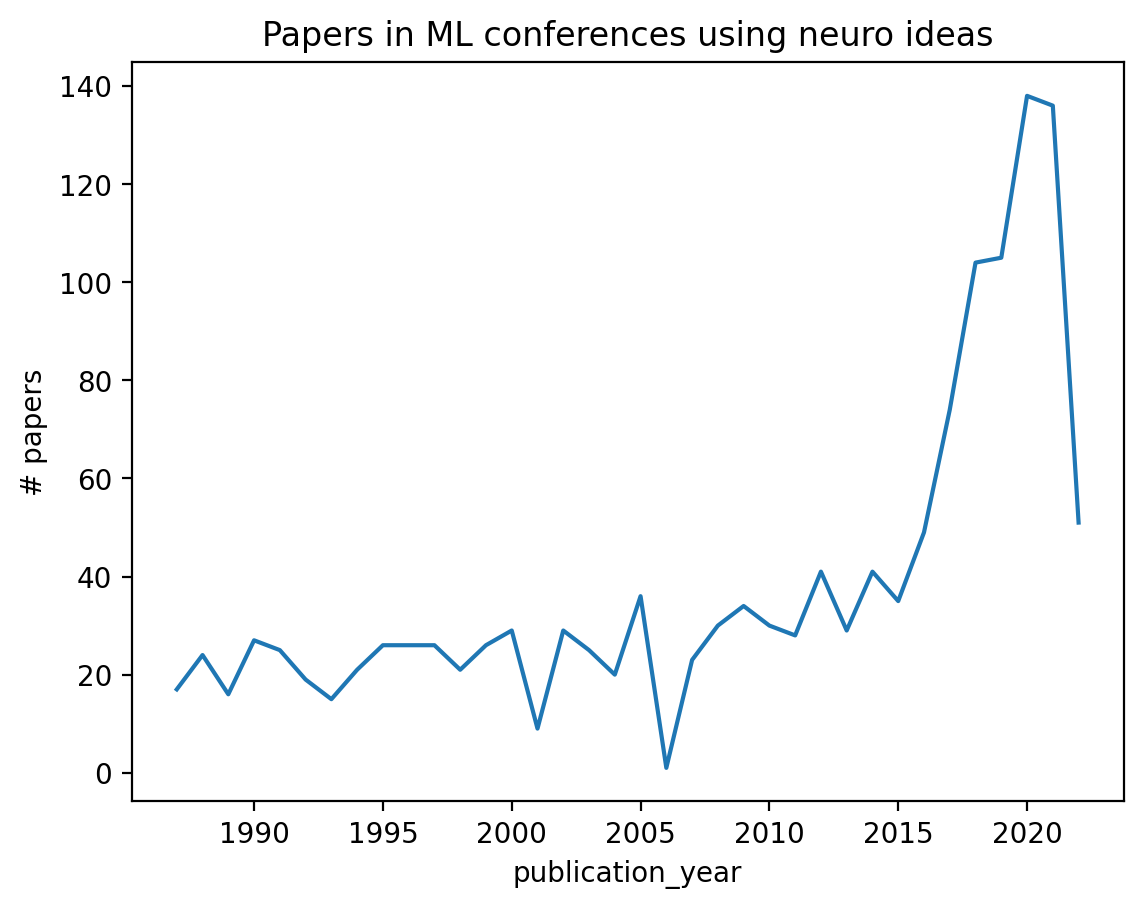

In [7]:
df_all[df_all.openai_category.isin(['A', 'C'])].groupby('publication_year').count().title.plot()
plt.title('Papers in ML conferences using neuro ideas')
plt.ylabel('# papers')

(0.0, 30.0)

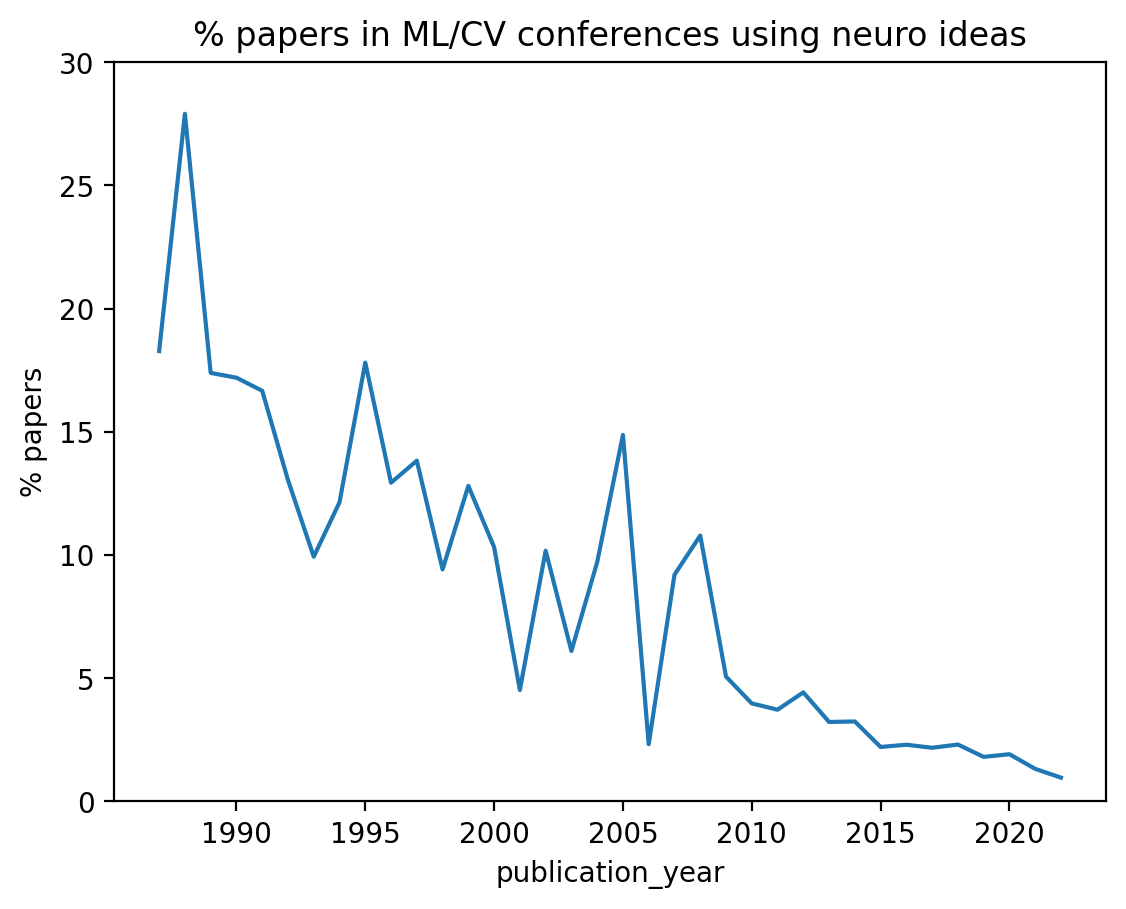

In [8]:
# Add up 2021 and 2022.
valid_idx = df_all.reason != "Manually added"

count_0 = df_all[valid_idx & ~df_all.openai_category.isna() & df_all.openai_category.isin(['A', 'C'])].groupby('publication_year').count().title
count_1 = df_all[valid_idx].groupby('publication_year').count().title
(100 * (count_0 / count_1)).plot()
plt.title('% papers in ML/CV conferences using neuro ideas')
plt.ylabel('% papers')
plt.ylim([0, 30])

Text(0.5, 1.0, 'Total papers in ML/CV conferences')

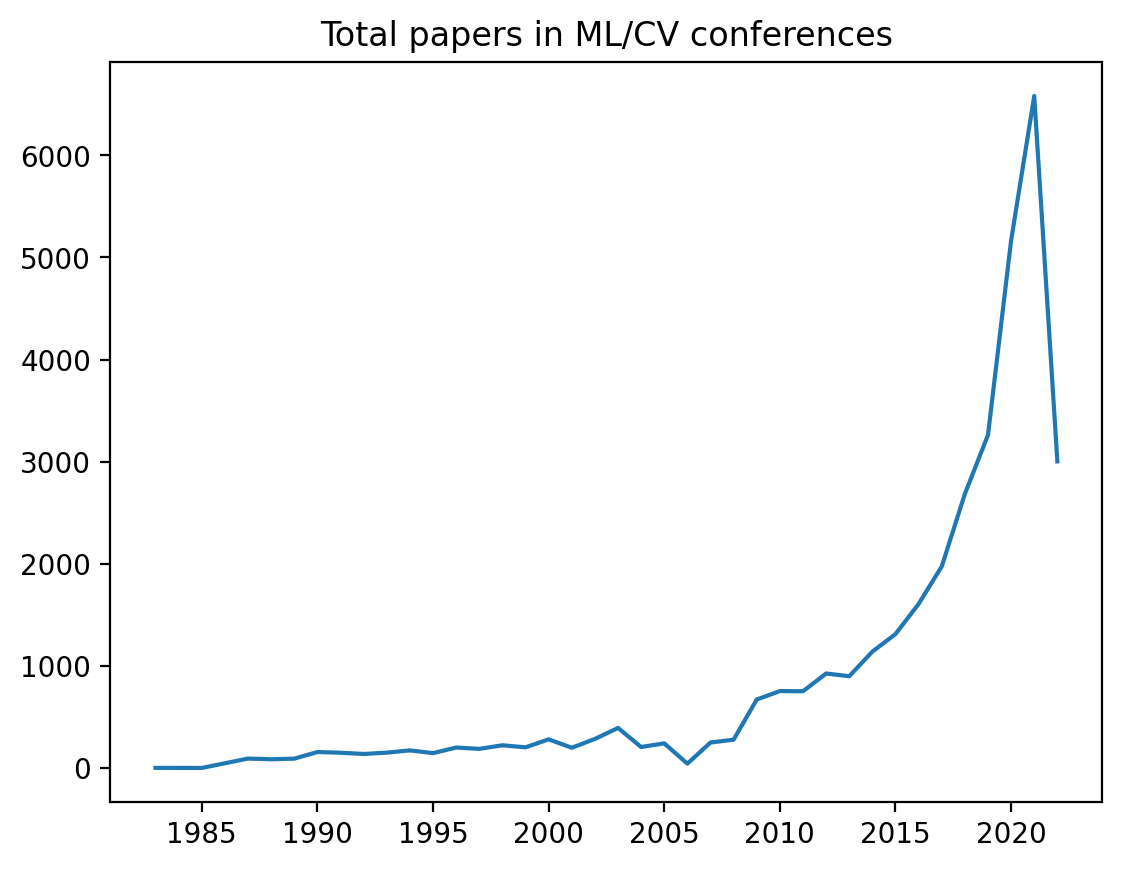

In [9]:
count_1 = df_all[valid_idx].groupby('publication_year').count().title
plt.plot(count_1)
plt.title('Total papers in ML/CV conferences')